In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st


In [60]:
file = "Resources/cleaned.csv"
data = pd.read_csv(file)
df = pd.DataFrame(data)
df.columns

Index(['Unnamed: 0', 'State', 'District', 'Persons', 'Males', 'Females',
       'Growth Rate', 'Rural', 'Number of Households',
       'Females per 1000 Males', 'Sex Ratio,0-6 Year Olds', 'Literate Persons',
       'Literacy Rate', 'Total Educated', 'Total Uneducated', 'Below Primary',
       'Primary', 'Middle', 'Matric.Higher.Secondary.Diploma',
       'Graduate Degree or Above', '1st Religion Name',
       '1st Religion Population', '2nd Religion Name',
       '2nd Religion Population', '3rd Religion Name',
       '3rd Religion Population', 'Drinking Water Facilities',
       'Safe Drinking Water Facilities', 'Electric Supply', 'Primary School',
       'Middle Schools', 'Secondary Schools', 'Medical Facilities',
       'Primary Health Centers', 'Communication Facilities', 'Bus Services',
       'Paved Approach Road', 'Mud Approach Road', 'Permanent Housing Rate',
       'Semi-Permanent Housing Rate', 'Temporary Housing Rate',
       'Rate of Clean Water Facilities',
       'Communic

## Brandon
Is there a correlation between literacy and the number of amenities that are present in each district?

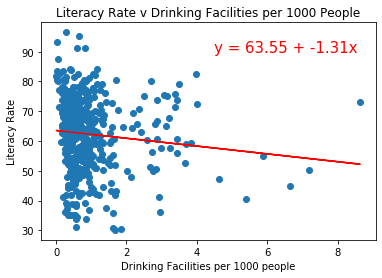

The correlation between the Literacy Rate and Drinking Facilities is -0.1
There is not much correlation between the Literacy Rate and Drinking Facilities


In [76]:
x_axis = df["Drinking Facilities per 1000 People"]
y_axis = df["Literacy Rate"]

plt.scatter(df["Drinking Facilities per 1000 People"], df["Literacy Rate"])
plt.xlabel("Drinking Facilities per 1000 people")
plt.ylabel("Literacy Rate")
plt.title("Literacy Rate v Drinking Facilities per 1000 People")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
predictions = x_axis * slope + intercept
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.plot(x_axis,predictions,"r-")
plt.annotate(line_eq,(4.5,90),fontsize=15,color="red")

plt.show()
print(f"The correlation between the Literacy Rate and Drinking Facilities is {round(rvalue,2)}")
print("There is not much correlation between the Literacy Rate and Drinking Facilities")


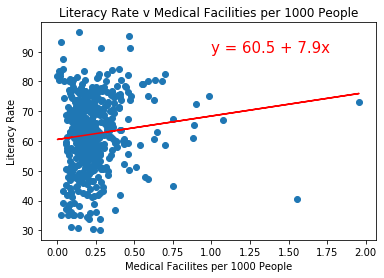

The correlation between Literacy Rate and Medical Facilities is 0.11
There is not much correlation between Literacy Rate and Medical Facilities


In [77]:
x_axis = df["Medical Facilities per 1000 People"]
y_axis = df["Literacy Rate"]

plt.scatter(df["Medical Facilities per 1000 People"], df["Literacy Rate"])
plt.xlabel("Medical Facilites per 1000 People")
plt.ylabel("Literacy Rate")
plt.title("Literacy Rate v Medical Facilities per 1000 People")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
predictions = x_axis * slope + intercept
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.plot(x_axis,predictions,"r-")
plt.annotate(line_eq,(1,90),fontsize=15,color="red")

plt.show()
print(f"The correlation between Literacy Rate and Medical Facilities is {round(rvalue,2)}")
print("There is not much correlation between Literacy Rate and Medical Facilities")

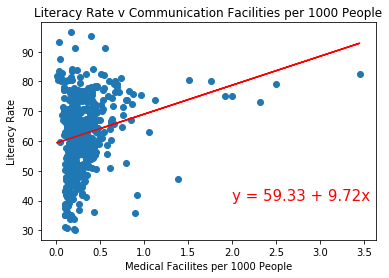

The correlation between Literacy Rate and Communication Facilities is 0.24
There is a small, positive correlation between Literacy Rate and Communication Facilities


In [78]:
x_axis = df["Communication Facilities per 1000 People"]
y_axis = df["Literacy Rate"]

plt.scatter(df["Communication Facilities per 1000 People"], df["Literacy Rate"])
plt.xlabel("Medical Facilites per 1000 People")
plt.ylabel("Literacy Rate")
plt.title("Literacy Rate v Communication Facilities per 1000 People")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
predictions = x_axis * slope + intercept
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.plot(x_axis,predictions,"r-")
plt.annotate(line_eq,(2,40),fontsize=15,color="red")

plt.show()
print(f"The correlation between Literacy Rate and Communication Facilities is {round(rvalue,2)}")
print("There is a small, positive correlation between Literacy Rate and Communication Facilities")


## Jake

How does the number of people per household and sex distribution impact the growth rate in India?

count    489.000000
mean       0.232679
std        0.113065
min       -0.040000
25%        0.160000
50%        0.230000
75%        0.280000
max        0.950000
Name: Growth Rate, dtype: float64


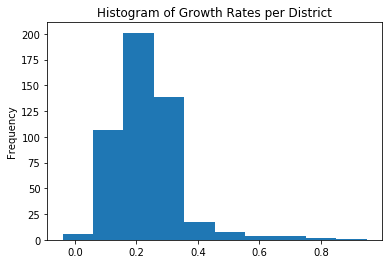

In [61]:
#Distribution and summary statistics for Growth Rate
summary_statistics = df['Growth Rate'].describe()
print(summary_statistics)
#Histogram to visualize distribution
df['Growth Rate'].plot(kind='hist',title='Histogram of Growth Rates per District')

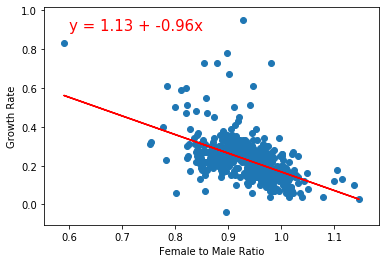

The correlation coeficient between Female/Male Ratio and Growth Rate is -0.51.
The r-squared of the regression is 0.26.


In [52]:
#Relation of Female to Male ratio (x) to Growth rate of the district (y)
x_values = df['Female to Male Ratio']
y_values = df['Growth Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x_values,y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(.6,.9),fontsize=15,color="red")
plt.xlabel('Female to Male Ratio')
plt.ylabel('Growth Rate')
plt.show()

print(f'The correlation coeficient between Female/Male Ratio and Growth Rate is {round(rvalue,2)}.')
print(f'The r-squared of the regression is {round(rvalue**2,2)}.')

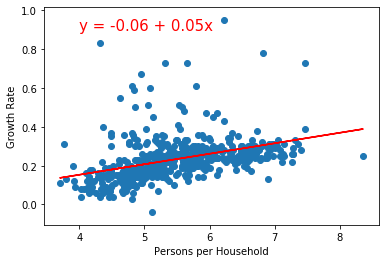

The correlation coeficient between Persons per Household and Growth Rate is 0.39.
The r-squared of the regression is 0.15.


In [79]:
#Relation of Persons per Household (x) to Growth rate of the district (y)
x_values = df['Persons per Household']
y_values = df['Growth Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x_values,y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(4,.9),fontsize=15,color="red")
plt.xlabel('Persons per Household')
plt.ylabel('Growth Rate')
plt.show()
# print(rvalue)
# print(rvalue**2)
print(f'The correlation coeficient between Persons per Household and Growth Rate is {round(rvalue,2)}.')
print(f'The r-squared of the regression is {round(rvalue**2,2)}.')

## Laura

Which religion is most common in each State? How are they distributed throughout India?

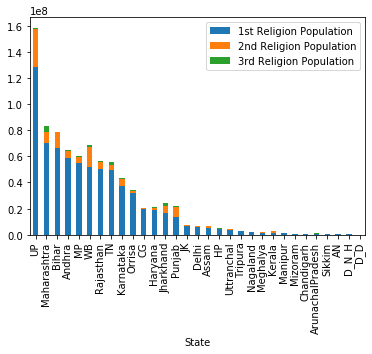

In [84]:
religion=df.groupby('State').sum()
religion=religion[['1st Religion Population', '2nd Religion Population', '3rd Religion Population']]
religion=religion.sort_values(['1st Religion Population', '2nd Religion Population', '3rd Religion Population'], ascending=[0,0,0])
religion.plot(kind='bar', stacked= True)
plt.show()

## Matt

Does the level of education decrease the more rural an area is? 

Text(0.5, 1.0, 'Medical Facilities in Rural Areas')

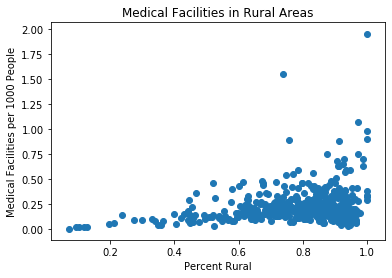

In [80]:
plt.scatter(df["Rural Percent Population"], df["Medical Facilities per 1000 People"])
plt.xlabel("Percent Rural")
plt.ylabel("Medical Facilities per 1000 People")
plt.title("Medical Facilities in Rural Areas")


Text(0.5, 1.0, 'Drinking Water Facilities in Rural Areas')

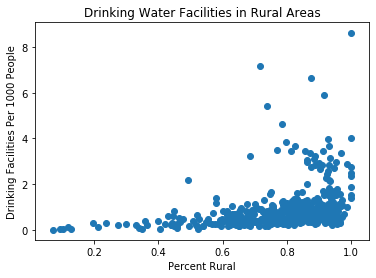

In [81]:
plt.scatter(df["Rural Percent Population"], df["Drinking Facilities per 1000 People"])
plt.xlabel("Percent Rural")
plt.ylabel("Drinking Facilities Per 1000 People")
plt.title("Drinking Water Facilities in Rural Areas")

Text(0.5, 1.0, 'Clean Water Facility Rates in Rural Areas')

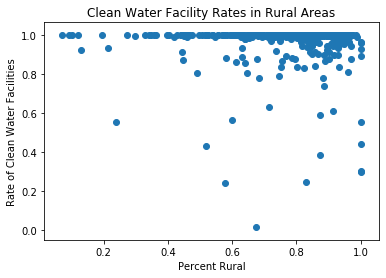

In [82]:
plt.scatter(df["Rural Percent Population"], df["Rate of Clean Water Facilities"])
plt.xlabel("Percent Rural")
plt.ylabel("Rate of Clean Water Facilities")
plt.title("Clean Water Facility Rates in Rural Areas")

Text(0.5, 1.0, 'Permanent Housing Rates in Rural Areas')

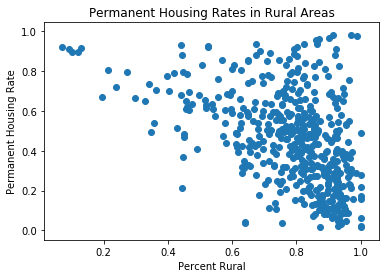

In [83]:
plt.scatter(df["Rural Percent Population"], df["Permanent Housing Rate"])
plt.xlabel("Percent Rural")
plt.ylabel("Permanent Housing Rate")
plt.title("Permanent Housing Rates in Rural Areas")

## Kevin

How does level of education relate to the quality of housing in each district?

Text(0.5, 1.0, 'Total Educated v Permanent Housing')

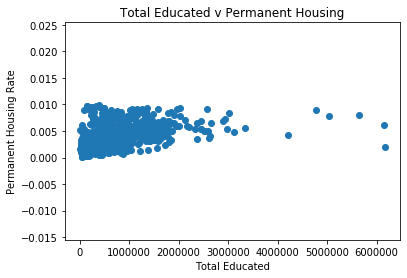

In [46]:
plt.scatter(df["Total Educated"], df["Permanent Housing Rate"])
plt.xlabel("Total Educated")
plt.ylabel("Permanent Housing Rate")
plt.title("Total Educated v Permanent Housing")

Text(0.5, 1.0, 'Total Educated v Semi-Permanent Housing Rate')

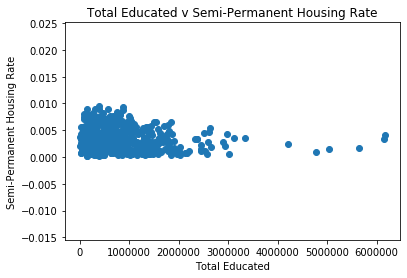

In [47]:
plt.scatter(df["Total Educated"], df["Semi-Permanent Housing Rate"])
plt.xlabel("Total Educated")
plt.ylabel("Semi-Permanent Housing Rate")
plt.title("Total Educated v Semi-Permanent Housing Rate")

Text(0.5, 1.0, 'Total Educated v Temporary Housing Rate')

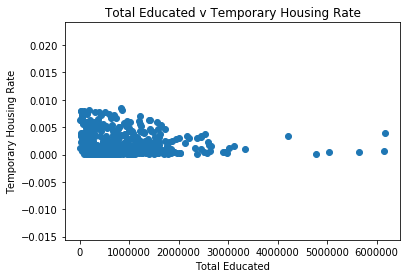

In [48]:
plt.scatter(df["Total Educated"], df["Temporary Housing Rate"])
plt.xlabel("Total Educated")
plt.ylabel("Temporary Housing Rate")
plt.title("Total Educated v Temporary Housing Rate")

Text(0.5, 1.0, 'Total Educated v Total Housing')

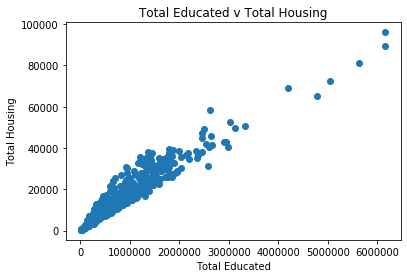

In [49]:
plt.scatter(df["Total Educated"], df["Total Housing"])
plt.xlabel("Total Educated")
plt.ylabel("Total Housing")
plt.title("Total Educated v Total Housing")